In [0]:
# Import packages as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

- Read the dataframe from the CSV file that was provided
- Append pd.Series to the DataFrame as we go to generate handy results


In [0]:
df = pd.read_csv('./SP500.csv', parse_dates=["Date"])
df.head()

,Date,SP500
0,2013-01-22,1492.560059
1,2013-01-23,1494.810059
2,2013-01-24,1494.819946
3,2013-01-25,1502.959961
4,2013-01-28,1500.180054


In [0]:
# Use log instead of percent difference formula to properly accumulate results
df["PercentDifference"] = np.log(df.SP500/df.SP500.shift(1))
df["10DayDifference"] = np.log(df.SP500/df.SP500.shift(10))
df.head(20)

,Date,SP500,PercentDifference,10DayDifference
0,2013-01-22,1492.560059,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN
2,2013-01-24,1494.819946,0.000007,NaN
3,2013-01-25,1502.959961,0.005431,NaN
4,2013-01-28,1500.180054,-0.001851,NaN
5,2013-01-29,1507.839966,0.005093,NaN
6,2013-01-30,1501.959961,-0.003907,NaN
7,2013-01-31,1498.109985,-0.002567,NaN
8,2013-01-02,1513.170044,0.010003,NaN
9,2013-04-02,1495.709961,-0.011606,NaN


## Rudimentary Data Visualization

Plot a histogram

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


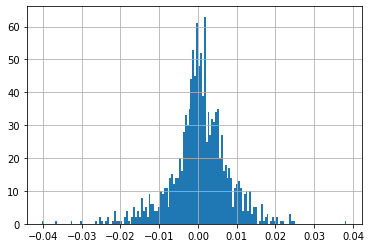

In [0]:
plt.hist(df["PercentDifference"], bins=160) # Change value of bins as needed for a better graph
plt.xlabel="PercentDifference"
plt.ylabel="Frequency"
plt.grid(True)
plt.show()

## Data Analysis

In [0]:
def located_and_scale(returns):
  size = len(returns)
  sorted_returns = sorted(returns)
  index = int(0.01 * size)
  return sorted_returns[index] * 10**0.5

### Find $VaR$ over a rolling window of 21 days



In [0]:
df["VaR"] = df["PercentDifference"].rolling(window=21, min_periods=1).apply(lambda x: located_and_scale(x))
df.head(40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


,Date,SP500,PercentDifference,10DayDifference,VaR,VaR_Actual
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,NaN,NaN,NaN
3,2013-01-25,1502.959961,0.005431,NaN,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,NaN,NaN,NaN
5,2013-01-29,1507.839966,0.005093,NaN,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,NaN,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,NaN,NaN,NaN
8,2013-01-02,1513.170044,0.010003,NaN,NaN,NaN
9,2013-04-02,1495.709961,-0.011606,NaN,NaN,NaN


### Find the Actual $VaR$ Amount, And Actual 10 day difference

In [0]:
df["VaR_Actual"] = df["SP500"] * df["VaR"]
df.head(40)

,Date,SP500,PercentDifference,10DayDifference,VaR,VaR_Actual
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,NaN,NaN,NaN
3,2013-01-25,1502.959961,0.005431,NaN,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,NaN,NaN,NaN
5,2013-01-29,1507.839966,0.005093,NaN,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,NaN,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,NaN,NaN,NaN
8,2013-01-02,1513.170044,0.010003,NaN,NaN,NaN
9,2013-04-02,1495.709961,-0.011606,NaN,NaN,NaN


In [0]:
df["Actual10DayDifference"] = df["SP500"] * df["10DayDifference"]
df.head(50)

,Date,SP500,PercentDifference,10DayDifference,VaR,VaR_Actual,Actual10DayDifference
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,NaN,NaN,NaN,NaN
3,2013-01-25,1502.959961,0.005431,NaN,NaN,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,NaN,NaN,NaN,NaN
5,2013-01-29,1507.839966,0.005093,NaN,NaN,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,NaN,NaN,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,NaN,NaN,NaN,NaN
8,2013-01-02,1513.170044,0.010003,NaN,NaN,NaN,NaN
9,2013-04-02,1495.709961,-0.011606,NaN,NaN,NaN,NaN


In [0]:
df["VaR_Actual_10DaysOld"] = df["VaR_Actual"].shift(10)
df.tail()

,Date,SP500,PercentDifference,10DayDifference,VaR,VaR_Actual,Actual10DayDifference,VaR_Actual_10DaysOld
1245,2017-12-29,2673.610107,-0.005197,0.008112,-0.016433,-43.935955,21.687823,-46.468988
1246,2018-02-01,2695.810059,0.008269,0.007447,-0.016433,-44.300771,20.074558,-34.516508
1247,2018-03-01,2713.060059,0.006378,0.008477,-0.016433,-44.584244,22.997341,-34.701613
1248,2018-04-01,2723.989990,0.004021,0.015733,-0.016433,-44.763858,42.855371,-34.589518
1249,2018-05-01,2743.149902,0.007009,0.023570,-0.016433,-45.078716,64.655919,-34.560881


## Data Visualization for Breaches

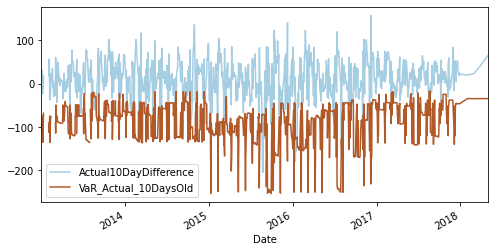

In [0]:
df.plot.line(x = "Date", y = ["Actual10DayDifference", "VaR_Actual_10DaysOld"], figsize=(8,4), colormap = 'Paired')

In [0]:
df["breaching"] = np.where(df["Actual10DayDifference"] < df["VaR_Actual_10DaysOld"],1, 0)

In [0]:
 b_df = df[df["breaching"] == 1]
 b_df.head()

,Date,SP500,PercentDifference,10DayDifference,VaR,VaR_Actual,Actual10DayDifference,VaR_Actual_10DaysOld,breaching
93,2013-05-06,1608.900024,-0.013876,-0.036770,-0.045570,-73.317969,-59.158925,-49.360322,1
143,2013-08-15,1661.319946,-0.014385,-0.027049,-0.045488,-75.570104,-44.936788,-20.610741,1
144,2013-08-16,1655.829956,-0.003310,-0.031998,-0.045488,-75.320376,-52.983293,-20.644552,1
145,2013-08-19,1646.060059,-0.005918,-0.036435,-0.045488,-74.875963,-59.973993,-20.614001,1
146,2013-08-20,1652.349976,0.003814,-0.026881,-0.045488,-75.162079,-44.417627,-30.806939,1


In [0]:
b_df["consecutiveBreach"] = np.where((b_df["Date"] - b_df["Date"].shift(1)).dt.days == 1, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
print("Number of breaches: {}".format(len(b_df)))
consecutive = b_df["consecutiveBreach"].sum()
print("Number of consecutive Breaches: {}".format(consecutive))
pct_breaching_in_total = len(b_df)/len(df)
print("Percent Breaches: {:.2%}".format(pct_breaching_in_total))

Number of breaches: 55
Number of consecutive Breaches: 20
Percent Breaches: 4.40%


## Final Results:

- Number of breaches: 55
- Number of consecutive Breaches: 20
- Percent Breaches: 4.40%